# Custom Training with Iris

This time we're getting out of Keras for our training loop. We're going to create a classic neural network that will be able to classify the different Iris flowers. 

* Import usuals librairies:
    * matplotlib.pyplot 
    * tensorflow 2.0

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt

* We're going to import Iris from the public dataset that Google Cloud. Use the [`tf.keras.utils.get_file`](https://www.tensorflow.org/api_docs/python/tf/keras/utils/get_file) function to download the iris dataset. 

Here is the url of the train dataset: 

`https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv`

In [ ]:
tf.keras.utils.get_file("iris.csv", 
                        "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv", 
                        cache_subdir="/content")

8192/2194 [================================================================================================================] - 0s 0us/step


'/content/iris.csv'

* Using `pandas` look at the head of your dataset `iris.csv`* Using `pandas` look at the head of your dataset `iris.csv`

In [ ]:
import pandas as pd

df = pd.read_csv("iris.csv")
df.head()

,120,4,setosa,versicolor,virginica
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


* The csv we downloaded is organized in a strange way. Here's the structure: 
  * The header gives us the size of the dataset, the number of features, the different class names.
  * The following lines describe each of the features and the target variable 
  
  Reorganize the dataframe so that you only have the features and variable ordering. You will keep the feature names and the label names in two separate lists. 

In [ ]:
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


In [ ]:
target = ['Iris setosa', 'Iris versicolor', 'Iris virginica']
target

['Iris setosa', 'Iris versicolor', 'Iris virginica']

* Now we need to put our dataset in a `tf.data.Dataset`. For this we need : 
  * Separate our dataset into x and y. 
  * Insert this in a `tf.data.Dataset.from_tensor_slices()`
  
Attention to insert a DataFrame in a tf.data.Dataset, you can technically insert only Numpy objects. So you will need to use `X.values`, `y.values`, `y.values`, `X.values`, `y.values` and `X.values`.

In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

dataset = tf.data.Dataset.from_tensor_slices((X.values, y.values))
dataset

<TensorSliceDataset shapes: ((4,), ()), types: (tf.float64, tf.int64)>

* We need to mix our dataset and define a batch_size. 
  * Add a `shuffle` to your dataset 
  * Add a batch_size of 16 to your dataset 

In [ ]:
batch_data = dataset.shuffle(len(X)).batch(16)
batch_data

<BatchDataset shapes: ((None, 4), (None,)), types: (tf.float64, tf.int64)>

* Check that everything went well by looking at a batch of your dataset 

In [ ]:
for batch in batch_data.take(1):
    print(batch)

(<tf.Tensor: shape=(16, 4), dtype=float64, numpy=
array([[5.5, 2.6, 4.4, 1.2],
       [6.1, 3. , 4.9, 1.8],
       [4.7, 3.2, 1.3, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [6.3, 3.4, 5.6, 2.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.7, 3. , 4.2, 1.2],
       [6.9, 3.2, 5.7, 2.3],
       [7.3, 2.9, 6.3, 1.8],
       [7.6, 3. , 6.6, 2.1],
       [7.7, 2.6, 6.9, 2.3],
       [5.4, 3.7, 1.5, 0.2],
       [6. , 2.9, 4.5, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [4.8, 3. , 1.4, 0.3]])>, <tf.Tensor: shape=(16,), dtype=int64, numpy=array([1, 2, 0, 0, 2, 0, 1, 2, 2, 2, 2, 0, 1, 1, 2, 0])>)


* We're all good for our dataset, so we're going to create a simple neural network model. Using Keras, define the following model: 
  * A first layer that takes 4 elements as input and outputs 10 outputs with ReLU as activation function.
  * A hidden layer that outputs 10 neurons with ReLU as an activation function. 
  * A last layer that outputs 3 outputs and uses softmax as activation function. 

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu", input_shape=[4]),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(3, activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                50        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 33        
Total params: 193
Trainable params: 193
Non-trainable params: 0
_________________________________________________________________


* Using [`tf.argmax()`](https://www.tensorflow.org/api_docs/python/tf/math/argmax). Output the first predictions from your model. 

Beware however, these will be completely random since we have not started a training phase. 

In [ ]:
for x_batch, y_batch in batch_data.take(1):
    print(tf.argmax(model.predict(x_batch), axis=1))

tf.Tensor([1 1 0 1 0 0 1 1 1 1 1 0 0 0 1 0], shape=(16,), dtype=int64)


* We'll have to define a cost function. Choose a cost function that you will store in a variable: `loss`.

In [ ]:
loss = tf.keras.losses.sparse_categorical_crossentropy

* Test your `loss` by putting as argument a batch of data as well as an output of the model on the same batch. 

In [ ]:
loss(y_batch, model(x_batch))

<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([0.6845034 , 0.70715255, 0.77645725, 2.0124116 , 0.7950868 ,
       0.8401266 , 2.0600996 , 2.0249436 , 2.0382228 , 0.62389004,
       2.1007276 , 0.86406845, 0.84658825, 0.9174962 , 0.70624465,
       0.8780808 ], dtype=float32)>

* There are two things left to do before we train our model: 
  1. Set up a function that will remember the gradients. 
  2. Set up an optimizer that will compile the gradients to go down to a minimum. 
  
  
Create a function that takes three arguments: `model, inputs, targets`. This function will record the gradients of your cost function and return two values: `loss_value, gradients`.

For more information, see this page [Gradient Tape](https://www.tensorflow.org/api_docs/python/tf/GradientTape)

In [ ]:
def grad(model, inputs, targets):
    with tf.GradientTape() as t:
        loss_value = loss(targets, model(inputs))
    gradients = t.gradient(loss_value, model.trainable_weights)
    
    return loss_value, gradients

* Now let's create an `optimizer'. We'll use Adam with a learning rate of 0.01.

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

* Apply your `grad` function to a batch of data with the template you just defined. Store your outputs in two variables: `loss_value, grads`.

In [ ]:
loss_value, grads = grad(model, x_batch, y_batch)

* Look at the outputs to make sure everything went right 

In [ ]:
loss_value

<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([0.6845034 , 0.70715255, 0.77645725, 2.0124116 , 0.7950868 ,
       0.8401266 , 2.0600996 , 2.0249436 , 2.0382228 , 0.62389004,
       2.1007276 , 0.86406845, 0.84658825, 0.9174962 , 0.70624465,
       0.8780808 ], dtype=float32)>

In [ ]:
grads

[<tf.Tensor: shape=(4, 10), dtype=float32, numpy=
 array([[  0.        , -13.324627  ,   7.082016  ,  15.827865  ,
          -7.7475286 ,   3.6450517 ,   0.        ,   0.        ,
           0.        ,   0.        ],
        [  0.        ,  -7.413921  ,   3.471418  ,   7.6787124 ,
          -5.01144   ,   2.191765  ,   0.        ,   0.        ,
           0.        ,   0.        ],
        [  0.        ,  -8.475433  ,   6.2001214 ,  13.3936    ,
          -2.3463166 ,   1.8771605 ,   0.        ,   0.        ,
           0.        ,   0.        ],
        [  0.        ,  -2.900112  ,   2.3756607 ,   5.0344653 ,
          -0.40303776,   0.59262216,   0.        ,   0.        ,
           0.        ,   0.        ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([ 0.       , -2.1979268,  1.0022361,  2.2889862, -1.5383589,
         0.63692  ,  0.       ,  0.       ,  0.       ,  0.       ],
       dtype=float32)>,
 <tf.Tensor: shape=(10, 10), dtype=float32, numpy=


* We're going to watch a first iteration of the gradients with an initial loss. Using [`optimizer.iterations`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and `loss_value` print the value of your loss at the first iteration. 

In [ ]:
print("Step: {}, Loss: {}".format(optimizer.iterations.numpy(),
                                  loss_value.numpy()))

Step: 0, Loss: [0.45398378 0.9794284  0.95345205 2.5429945  0.56303453 2.2829192
 0.96438104 0.4797882  1.0117159  2.706407   1.0281762  2.3724139
 0.9763645  1.0200608  0.95139766 0.55832106]


* We have our first iteration 0, where we didn't apply our optimizer. Let's use it now for our second iteration. To do this, use : 

[`optimizer.apply_gradients(zip(gradients, weights))`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam#apply_gradients)

In [ ]:
optimizer.apply_gradients(zip(grads, model.trainable_weights))

<tf.Variable 'UnreadVariable' shape=() dtype=int64, numpy=1>

* Make a new prediction with your updated variables and calculate your loss. 

In [ ]:
loss(y_batch, model(x_batch))

<tf.Tensor: shape=(16,), dtype=float32, numpy=
array([0.6356413 , 0.8886737 , 0.8537485 , 1.9707489 , 0.70967984,
       1.984489  , 0.850934  , 0.6553815 , 0.9141853 , 2.1860027 ,
       0.92589206, 1.980977  , 0.8747129 , 0.9293974 , 0.8432012 ,
       0.7145919 ], dtype=float32)>

* We've got everything we need to start training our model all over the dataset. To do this you'll need: 

1. Set the number of epochs (**REMINDER**: An epoch is a pass over the entire dataset)

2. Create a loop on the number of epochs 

3. Inside each epoch, you will have to calculate the gradients for each step of your model and update them.

4. You should keep some statistics in mind and take the average `loss` per epoch and `SparseCategoricalAccuracy` as metric. Here is some documentation to help you 

* [tf.keras.metrics.Mean()](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Mean)
* [tf.keras.metrics.SparseCategoricalAccuracy](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/SparseCategoricalAccuracy)


In [ ]:
train_loss_results = []
train_accuracy_results = []

num_epochs = 150

for epoch in range(num_epochs):
    epoch_loss_avg = tf.keras.metrics.Mean()
    epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

    # Training loop - using batches of 16
    for x, y in batch_data:
        # Optimize the model
        loss_value, grads = grad(model, x, y)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Track progress
        epoch_loss_avg(loss_value)  # add current batch loss
        # compare predicted label to actual label
        epoch_accuracy(y, model(x))

    # end epoch
    train_loss_results.append(epoch_loss_avg.result())
    train_accuracy_results.append(epoch_accuracy.result())

    if epoch % 50 == 0:
        print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                    epoch_loss_avg.result(),
                                                                    epoch_accuracy.result()))

Epoch 000: Loss: 1.089, Accuracy: 51.667%
Epoch 050: Loss: 0.063, Accuracy: 98.333%
Epoch 100: Loss: 0.111, Accuracy: 97.500%


* Since you have kept your average loss per epoch as well as your accuracy, insert them in two different graphs. 

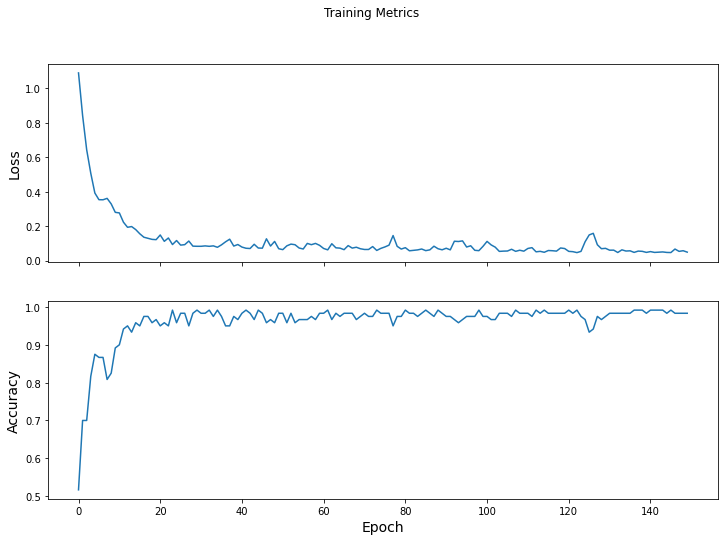

In [ ]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

* Now let's evaluate our model. For this, we will need to download the *test_set* of iris. Proceed in the same way as at the beginning of this exercise to insert the csv in a `tf.data.Dataset`.

In [ ]:
tf.keras.utils.get_file("iris_test.csv", 
                        "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv", 
                        cache_subdir="/content")

8192/573 [============================================================================================================================================================================================================================================================================================================================================================================================================================================] - 0s 0us/step


'/content/iris_test.csv'

In [ ]:
df = pd.read_csv("iris_test.csv")
df.head()

,30,4,setosa,versicolor,virginica
0,5.9,3.0,4.2,1.5,1
1,6.9,3.1,5.4,2.1,2
2,5.1,3.3,1.7,0.5,0
3,6.0,3.4,4.5,1.6,1
4,5.5,2.5,4.0,1.3,1


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

dataset = tf.data.Dataset.from_tensor_slices((X.values, y.values)).shuffle(len(X)).batch(16)
dataset

<BatchDataset shapes: ((None, 4), (None,)), types: (tf.float64, tf.int64)>

* Now let's test our model on the test data. We'll need to loop through the dataset and calculate our accuracy. 

In [ ]:
test_accuracy = tf.keras.metrics.Accuracy()

for (x, y) in dataset:
    pred_probas = model(x)
    prediction = tf.argmax(pred_probas, axis=1, output_type=tf.int32)
    test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 96.667%
